In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy
from spacy import displacy

In [7]:
NER = spacy.load('en_core_web_lg')

In [8]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import os
import logging

import re   #regular expression library to cleanup the text
import networkx as nx #for network analysis
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk

## Data Cleaning and Preprocessing

In [9]:
with open("Alice in wonderland.txt","r",encoding='utf8')as rf:
    text = rf.read()

In [10]:
text = text[text.find("CHAPTER XII.   Alice’s Evidence")+len("CHAPTER XII.   Alice’s Evidence"):text.find("*** END OF THE PROJECT GUTENBERG EBOOK")].strip()

In [11]:
text = re.sub(r'\n{6}', ' ', text)
text = text.replace(".","")

In [12]:
chapters = re.split(r"Chapter \d {1,2}", text)

In [13]:
paragraphs = text.split("\n")

In [14]:
print(text[:1000])

CHAPTER I
Down the Rabbit-Hole


Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into
the book her sister was reading, but it had no pictures or
conversations in it, “and what is the use of a book,” thought Alice
“without pictures or conversations?”

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure of
making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her

There was nothing so _very_ remarkable in that; nor did Alice think it
so _very_ much out of the way to hear the Rabbit say to itself, “Oh
dear! Oh dear! I shall be late!” (when she thought it over afterwards,
it occurred to her that she ought to have wondered at this, but at the
time it all seemed quite natural); but when the Rabbit actually _took a
watch out of its wai

In [15]:
output_dir = "Alice_chapters"
os.makedirs(output_dir, exist_ok=True)

# Assuming `text` contains your book text
# Update the regex to match 'CHAPTER' followed by Roman numerals
chapters = re.split(r"CHAPTER\s+([IVXLCDM]+)", text)

# Process chapters assuming that each even index in 'chapters' is the Roman numeral and the next index is the text
for i in range(1, len(chapters), 2):
    chapter_title = chapters[i].strip()  # This should be the Roman numeral
    chapter_text = chapters[i+1].strip()  # This should be the chapter content
    if not chapter_text:  # Skip empty chapters
        continue
    filename = f"{output_dir}/CHAPTER_{chapter_title}.txt"  # Use the chapter Roman numeral for the filename
    with open(filename, "w", encoding="utf-8") as f:
        f.write(chapter_text)  # Write the chapter text to the file

print(f"Saved {len(chapters) // 2} chapters into the '{output_dir}' directory.")

Saved 12 chapters into the 'Alice_chapters' directory.


In [16]:
book_doc = NER(text)

In [17]:
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [18]:
# Visualize identified entities
displacy.render(book_doc[0:2000], style="ent", jupyter=True)

# get named entity list per sentence

In [19]:
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [20]:
sent_entity_df

,sentence,entities
0,"(CHAPTER, I, \n, Down, the, Rabbit, -, Hole, \...","[Alice, Alice]"
1,"(So, she, was, considering, in, her, own, mind...",[Alice]
2,"(much, out, of, the, way, to, hear, the, Rabbi...",[]
3,"(Oh, dear, !)",[]
4,"(I, shall, be, late, !, ”)",[]
...,...,...
476,"(At, this, the, whole, pack, rose, up, into, t...","[half, half, Alice]"
477,"(“, Oh, ,, I, ’ve, had, such, a, curious, drea...",[Alice]
478,"(So, Alice, got, up, and, ran, off, ,, thinkin...","[Alice, Alice, Adventures]"
479,"(First, ,, she, dreamed, of, little, Alice, he...","[First, Alice, Mouse, March, Queen, Duchess, G..."


# Create a character CSV AND Build a filter

In [21]:
# Define the list of characters
characters = [
       "Alice", "Rabbit", "Queen", "King", "Cat", "Hatter", "Hare",
    "Dormouse", "Caterpillar", "Duchess", "Gryphon", "Knave of Hearts",
    "Turtle", "Bill", "Dodo", "Duck", "Lory",
    "Eaglet", "Cook", "Pigeon", "Two", "Five", "Seven", "Bill", "Frog","Mouse","Footman"
]

character_df = pd.DataFrame(characters, columns=['Character_name'])

character_df.to_csv('alice_character.csv',index=False)

print("the characters name has been save to 'alice_characaters.csv'")

the characters name has been save to 'alice_characaters.csv'


In [22]:
character_df

,Character_name
0,Alice
1,Rabbit
2,Queen
3,King
4,Cat
5,Hatter
6,Hare
7,Dormouse
8,Caterpillar
9,Duchess


In [23]:
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list 
            if ent in list(character_df['Character_name']) ]

In [24]:
filter_entity(["Rabbit","Fay",2], character_df)

['Rabbit']

In [21]:
print(character_df)

     Character_name
0             Alice
1            Rabbit
2             Queen
3              King
4               Cat
5            Hatter
6              Hare
7          Dormouse
8       Caterpillar
9           Duchess
10          Gryphon
11  Knave of Hearts
12           Turtle
13             Bill
14             Dodo
15             Duck
16             Lory
17           Eaglet
18             Cook
19           Pigeon
20              Two
21             Five
22            Seven
23             Bill
24             Frog
25            Mouse
26          Footman


In [22]:
# Assuming sent_entity_df is constructed like this:
sent_entity_df['characters_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

# Ensure the DataFrame is checked after applying the function
print(sent_entity_df[['sentence', 'entities', 'characters_entities']])

                                              sentence  \
0    (CHAPTER, I, \n, Down, the, Rabbit, -, Hole, \...   
1    (So, she, was, considering, in, her, own, mind...   
2    (much, out, of, the, way, to, hear, the, Rabbi...   
3                                        (Oh, dear, !)   
4                           (I, shall, be, late, !, ”)   
..                                                 ...   
476  (At, this, the, whole, pack, rose, up, into, t...   
477  (“, Oh, ,, I, ’ve, had, such, a, curious, drea...   
478  (So, Alice, got, up, and, ran, off, ,, thinkin...   
479  (First, ,, she, dreamed, of, little, Alice, he...   
480  (So, she, sat, on, ,, with, closed, eyes, ,, a...   

                                              entities  \
0                                       [Alice, Alice]   
1                                              [Alice]   
2                                                   []   
3                                                   []   
4            

In [23]:
# Take only first name of characters
sent_entity_df_filtered['characters_entities'] = sent_entity_df_filtered['characters_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

NameError: name 'sent_entity_df_filtered' is not defined

In [24]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

NameError: name 'sent_entity_df_filtered' is not defined

In [27]:
import pandas as pd
import spacy

# Assuming spacy and character DataFrame are already set up
nlp = spacy.load('en_core_web_sm')  # Consider 'en_core_web_md' or 'en_core_web_lg' for better accuracy

# Load text from your file
with open('Alice in wonderland.txt', 'r', encoding='utf-8') as file:
    text = file.read()

doc = nlp(text)

# Extract sentences and entities
sentences = [sent for sent in doc.sents]
entities = [[ent.text for ent in sent.ents] for sent in sentences]

# DataFrame setup
sent_entity_df = pd.DataFrame({
    'sentence': sentences,
    'entities': entities
})

# Filter entities that match character names or nicknames
def filter_entity(ent_list, character_df):
    character_names = set(character_df['Character_name'].tolist())
    return [ent for ent in ent_list if ent in character_names]

sent_entity_df['characters_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

# Print the DataFrame to check outputs
print(sent_entity_df[['characters_entities']])

# Further analysis to understand interaction dynamics
# More details here could depend on specific requirements or insights from initial data checks


     characters_entities
0                [Alice]
1                     []
2                     []
3                [Alice]
4                     []
...                  ...
1559                  []
1560                  []
1561                  []
1562                  []
1563                  []

[1564 rows x 1 columns]


## analyze relationship

In [29]:
window_size = 10
relationships = []

for i in range(sent_entity_df.index[-1]):
    end_i = min(i+5, sent_entity_df.index[-1])
    char_list = sum((sent_entity_df.loc[i: end_i].characters_entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [30]:
relationships

[{'source': 'Alice', 'target': 'Rabbit'},
 {'source': 'Rabbit', 'target': 'Alice'},
 {'source': 'Alice', 'target': 'Rabbit'},
 {'source': 'Rabbit', 'target': 'Alice'},
 {'source': 'Alice', 'target': 'Rabbit'},
 {'source': 'Rabbit', 'target': 'Alice'},
 {'source': 'Rabbit', 'target': 'Alice'},
 {'source': 'Rabbit', 'target': 'Alice'},
 {'source': 'Rabbit', 'target': 'Alice'},
 {'source': 'Alice', 'target': 'Mouse'},
 {'source': 'Alice', 'target': 'Mouse'},
 {'source': 'Mouse', 'target': 'Alice'},
 {'source': 'Alice', 'target': 'Mouse'},
 {'source': 'Mouse', 'target': 'Alice'},
 {'source': 'Alice', 'target': 'Mouse'},
 {'source': 'Mouse', 'target': 'Alice'},
 {'source': 'Alice', 'target': 'Mouse'},
 {'source': 'Mouse', 'target': 'Alice'},
 {'source': 'Alice', 'target': 'Mouse'},
 {'source': 'Mouse', 'target': 'Alice'},
 {'source': 'Alice', 'target': 'Mouse'},
 {'source': 'Alice', 'target': 'Mouse'},
 {'source': 'Mouse', 'target': 'Alice'},
 {'source': 'Alice', 'target': 'Mouse'},
 {'sour

In [27]:
relationship_df = pd.DataFrame(relationships)
relationship_df.to_csv("alice_relationship_df.csv",index=False)

In [28]:
pd.set_option('display.max_rows', None)
relationship_df.head

<bound method NDFrame.head of            source       target
0           Alice       Rabbit
1          Rabbit        Alice
2           Alice       Rabbit
3          Rabbit        Alice
4           Alice       Rabbit
5          Rabbit        Alice
6          Rabbit        Alice
7          Rabbit        Alice
8          Rabbit        Alice
9           Alice        Mouse
10          Alice        Mouse
11          Mouse        Alice
12          Alice        Mouse
13          Mouse        Alice
14          Alice        Mouse
15          Mouse        Alice
16          Alice        Mouse
17          Mouse        Alice
18          Alice        Mouse
19          Mouse        Alice
20          Alice        Mouse
21          Alice        Mouse
22          Mouse        Alice
23          Alice        Mouse
24          Mouse        Alice
25          Mouse        Alice
26          Alice        Mouse
27          Mouse        Alice
28          Alice        Mouse
29          Alice        Mouse
30       

In [29]:
# Sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df


,source,target
0,Alice,Rabbit
1,Alice,Rabbit
2,Alice,Rabbit
3,Alice,Rabbit
4,Alice,Rabbit
5,Alice,Rabbit
6,Alice,Rabbit
7,Alice,Rabbit
8,Alice,Rabbit
9,Alice,Mouse


In [30]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [31]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

In [32]:
from itertools import cycle

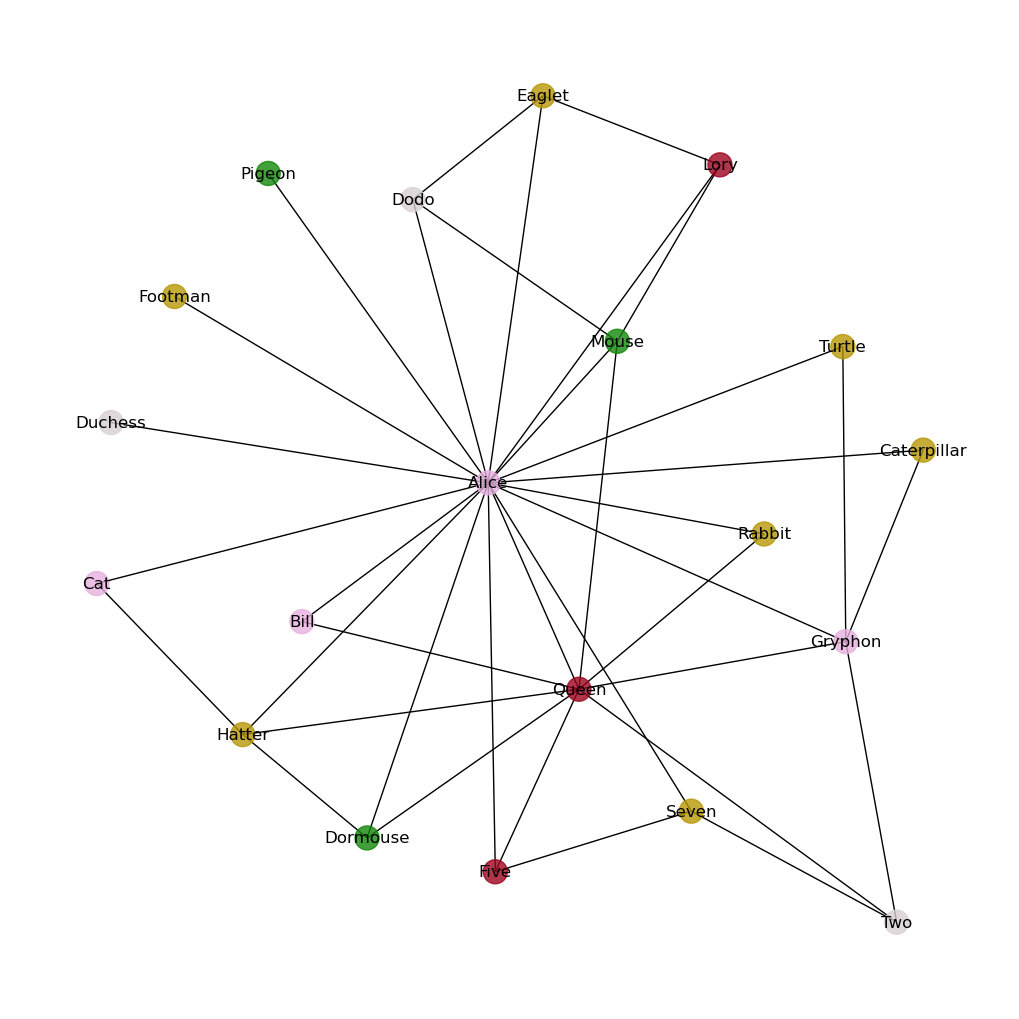

In [33]:
colors = ['#e6b1deCC', '#b89706CC', '#13870bCC', '#9c051eCC', '#b89706CC','#d9d0d2CC']
color_cycle = cycle(colors) 
color_map = {node: next(color_cycle) for node in G.nodes()}

plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color=[color_map[node] for node in G.nodes()], edge_cmap=plt.cm.Blues, pos = pos)
plt.show()


In [36]:
from pyvis.network import Network
net = Network(notebook = True, cdn_resources="remote",width="100%", height="1000", bgcolor='#000', font_color='white')

net.show_buttons(filter_=['physics'])


node_degree = dict(G.degree)
node_values = {node: sum(data['value'] for _, _, data in G.edges(node, data=True)) for node in G.nodes()}


for node in G.nodes():
    net.add_node(node, color=color_map[node], size=node_degree[node]*15) 
    # size adjusted for visual proportionality

# Add edges from G to the Pyvis network
for edge in G.edges(data=True):
    net.add_edge(edge[0], edge[1], value=edge[2]['value'])

net.options.physics.enabled = True
net.options.physics.barnesHut = {
    "gravitationalConstant": -27380,
    "centralGravity": 0.025,
    "springLength": 425,
    "springConstant": 0.05
}

# Show the network
net.show("alice2.html")

alice2.html


In [35]:
node_degree

{'Alice': 18,
 'Rabbit': 2,
 'Mouse': 4,
 'Lory': 3,
 'Eaglet': 3,
 'Dodo': 3,
 'Bill': 2,
 'Caterpillar': 2,
 'Pigeon': 1,
 'Queen': 9,
 'Footman': 1,
 'Duchess': 1,
 'Cat': 2,
 'Hatter': 4,
 'Dormouse': 3,
 'Five': 3,
 'Seven': 3,
 'Two': 3,
 'Gryphon': 5,
 'Turtle': 2}

In [55]:
import json

In [1]:
nodes = [{'id': node, 'label': node, 'value': node_values[node]} for node in G.nodes()]
edges = [{'from': u, 'to': v, 'value': d['value']} for u, v, d in G.edges(data=True)]

NameError: name 'G' is not defined

In [57]:
nodes_json = json.dumps(nodes)
edges_json = json.dumps(edges)

# Optionally save to a file
with open('nodes.json', 'w') as f:
    f.write(nodes_json)
with open('edges.json', 'w') as f:
    f.write(edges_json)

In [58]:
node_data = [
    {
        'id': node,
        'label': node,
        'color': color_map[node],
        'value': node_degree[node] * 15 
    } for node in G.nodes()
]

edge_data = [
    {
        'from': u,
        'to': v,
        'value': d['value']
    } for u, v, d in G.edges(data=True)
]

# Combining node and edge data
alice_data = {
    'nodes': node_data,
    'edges': edge_data
}

# Save to a JSON file
with open('alicewonder_data.json', 'w') as f:
    json.dump(alice_data, f, indent=2)

In [233]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Alice': 0.9473684210526315,
 'Rabbit': 0.10526315789473684,
 'Mouse': 0.21052631578947367,
 'Lory': 0.15789473684210525,
 'Eaglet': 0.15789473684210525,
 'Dodo': 0.15789473684210525,
 'Bill': 0.10526315789473684,
 'Caterpillar': 0.10526315789473684,
 'Pigeon': 0.05263157894736842,
 'Queen': 0.47368421052631576,
 'Footman': 0.05263157894736842,
 'Duchess': 0.05263157894736842,
 'Cat': 0.10526315789473684,
 'Hatter': 0.21052631578947367,
 'Dormouse': 0.15789473684210525,
 'Five': 0.15789473684210525,
 'Seven': 0.15789473684210525,
 'Two': 0.15789473684210525,
 'Gryphon': 0.2631578947368421,
 'Turtle': 0.10526315789473684}

In [234]:
sorted_degrees = dict(sorted(G.degree, key=lambda x: x[1], reverse=True))

sorted_degrees

{'Alice': 18,
 'Queen': 9,
 'Gryphon': 5,
 'Mouse': 4,
 'Hatter': 4,
 'Lory': 3,
 'Eaglet': 3,
 'Dodo': 3,
 'Dormouse': 3,
 'Five': 3,
 'Seven': 3,
 'Two': 3,
 'Rabbit': 2,
 'Bill': 2,
 'Caterpillar': 2,
 'Cat': 2,
 'Turtle': 2,
 'Pigeon': 1,
 'Footman': 1,
 'Duchess': 1}

<Axes: >

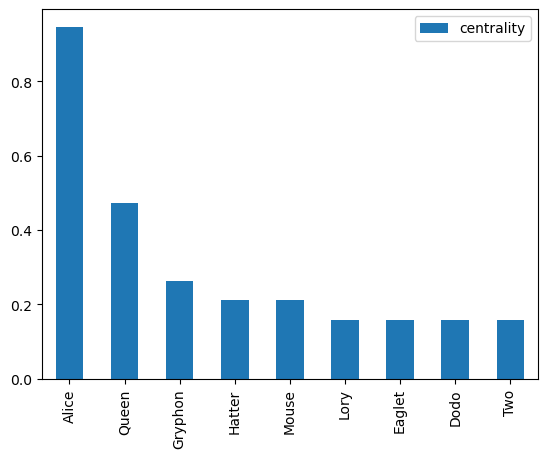

In [235]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [236]:
sorted_degrees = dict(sorted(G.degree, key=lambda x: x[1], reverse=True))

sorted_degrees

{'Alice': 18,
 'Queen': 9,
 'Gryphon': 5,
 'Mouse': 4,
 'Hatter': 4,
 'Lory': 3,
 'Eaglet': 3,
 'Dodo': 3,
 'Dormouse': 3,
 'Five': 3,
 'Seven': 3,
 'Two': 3,
 'Rabbit': 2,
 'Bill': 2,
 'Caterpillar': 2,
 'Cat': 2,
 'Turtle': 2,
 'Pigeon': 1,
 'Footman': 1,
 'Duchess': 1}

<Axes: >

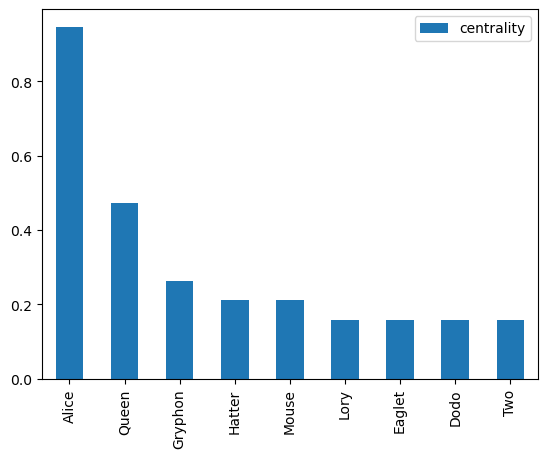

In [237]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

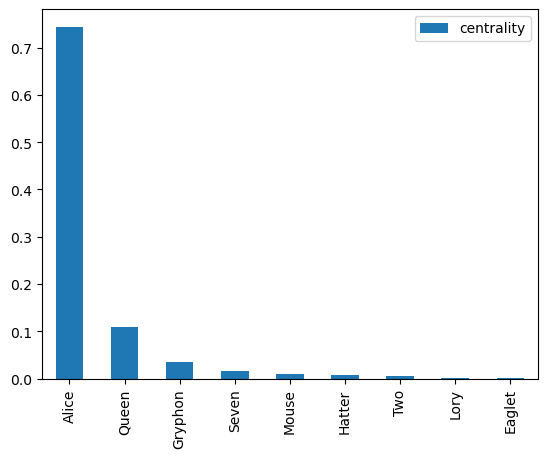

In [238]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

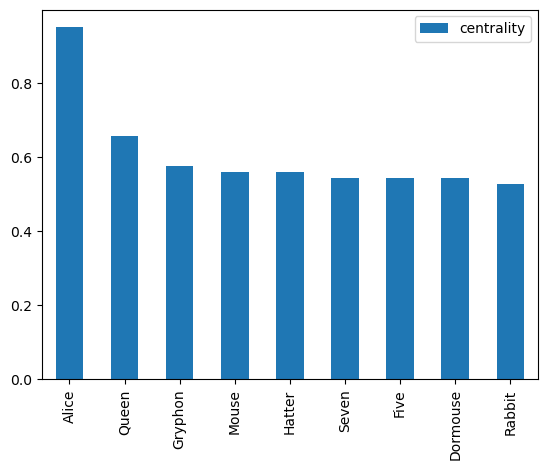

In [239]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [240]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

In [246]:
node_degree = dict(G.degree)

In [247]:
node_degree

{'Alice': 18,
 'Rabbit': 2,
 'Mouse': 4,
 'Lory': 3,
 'Eaglet': 3,
 'Dodo': 3,
 'Bill': 2,
 'Caterpillar': 2,
 'Pigeon': 1,
 'Queen': 9,
 'Footman': 1,
 'Duchess': 1,
 'Cat': 2,
 'Hatter': 4,
 'Dormouse': 3,
 'Five': 3,
 'Seven': 3,
 'Two': 3,
 'Gryphon': 5,
 'Turtle': 2}

In [249]:
nx.set_node_attributes(G,node_degree,'size')

In [250]:
plot_network(G,node_color=node_colors,node_size=node_degree)

NameError: name 'plot_network' is not defined

In [32]:
import community as community_louvain

In [33]:
communities = community_louvain.best_partition(G)
communities

NameError: name 'G' is not defined

In [243]:
nx.set_node_attributes(G,communities, 'group')

In [31]:
com_net = Network(notebook = True, width="100%", height="700px", bgcolor='#000000', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
doubled_size = {node: degree * 2.5 for node, degree in node_degree.items()}
nx.set_node_attributes(G, doubled_size, 'size')

com_net.options.physics.enabled = True
com_net.options.physics.solver = 'forceAtlas2Based'  # or 'repulsion'
com_net.options.physics.forceAtlas2Based = {
    "gravitationalConstant": -100,
    "centralGravity": 0.005,
    "springLength": 200,
    "springConstant": 0.05,
}

com_net.from_nx(G)
com_net.show("witcher_communities.html")

NameError: name 'Network' is not defined